In [17]:
import geopandas as gpd
import struct
import contextily as cx
from pathlib import Path
from itertools import islice

In [18]:
DATA_FOLDER = Path('../data')

In [19]:
def plot_points(bin_file, color, limit=250000):
    DSIZE = struct.calcsize("d")

    def _yield_doubles():
        with open(bin_file, 'rb') as f:
            while chunk := f.read(DSIZE):
                yield struct.unpack("d", chunk)[0]

    coords = list(islice(_yield_doubles(), limit))
    lats = coords[::2]
    lons = coords[1::2]

    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lons, lats, crs=4326))
    
    ax = gdf.plot(marker='.', color=color, markersize=0.01, figsize=(6, 6))

    provider = cx.providers.Stadia.AlidadeSmooth
    provider["url"] = provider["url"] + "?api_key=37ed8692-5b86-4858-bc00-d439e91491e1"
    cx.add_basemap(ax, crs=gdf.crs.to_string(), source=provider)

# 1. Taxi datasets.

In [20]:
# Default colors for matplotlib subplots. Choose to match other plots.
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

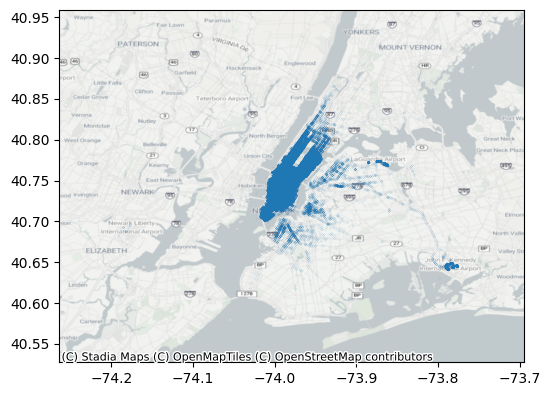

In [21]:
plot_points(DATA_FOLDER / 'taxi' / 'nyc-taxi' / 'nyc-taxi-0_25m.bin', COLORS[0])

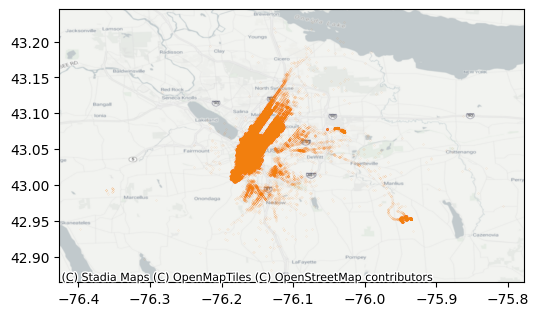

In [22]:
plot_points(DATA_FOLDER / 'taxi' / 'syracuse-taxi' / 'syracuse-taxi-0_25m.bin', COLORS[1])

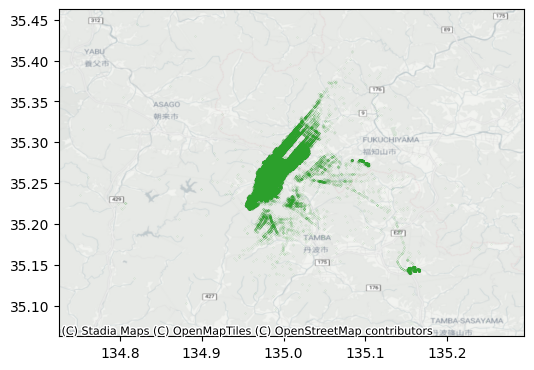

In [23]:
plot_points(DATA_FOLDER / 'taxi' / 'aogaki-taxi' / 'aogaki-taxi-0_25m.bin', COLORS[2])

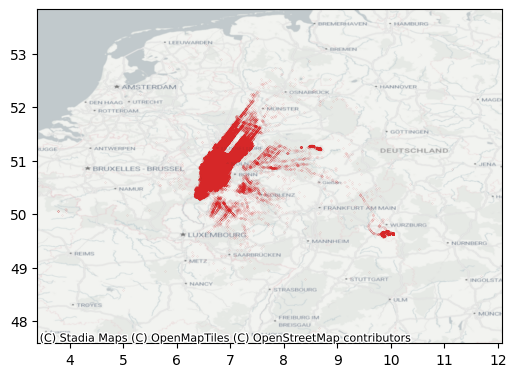

In [24]:
plot_points(DATA_FOLDER / 'taxi' / 'germany-taxi' / 'germany-taxi-0_25m.bin', COLORS[3])

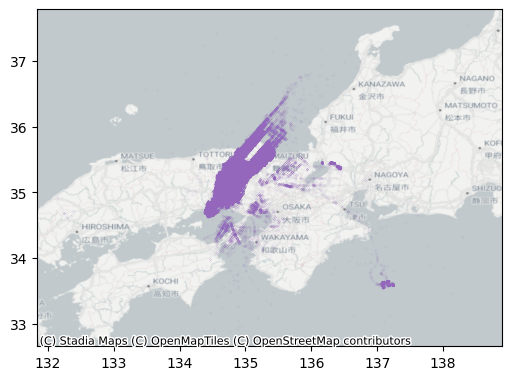

In [25]:
plot_points(DATA_FOLDER / 'taxi' / 'japan-taxi' / 'japan-taxi-0_25m.bin', COLORS[4])

# 2. Synthetic datasets

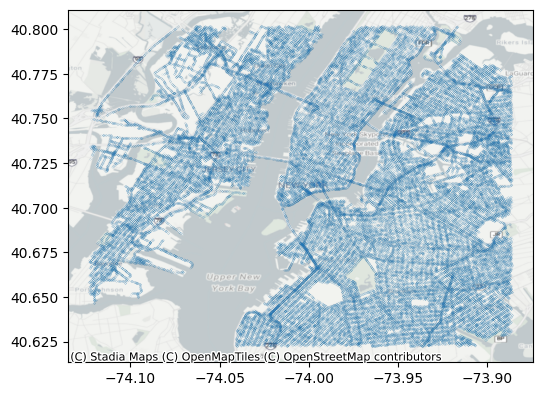

In [32]:
plot_points(DATA_FOLDER / 'synthetic' / 'nyc' / 'nyc-25m.bin', COLORS[0])

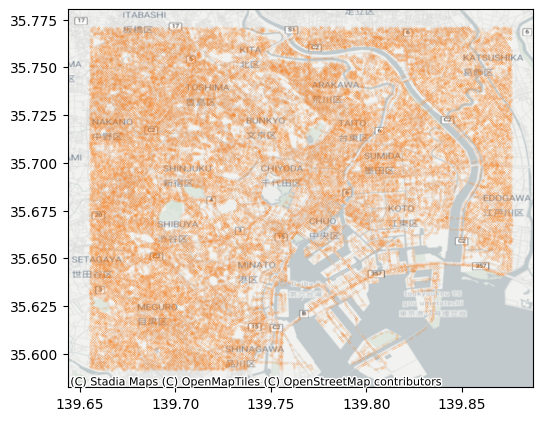

In [28]:
plot_points(DATA_FOLDER / 'synthetic' / 'tokyo' / 'tokyo-25m.bin', COLORS[1])

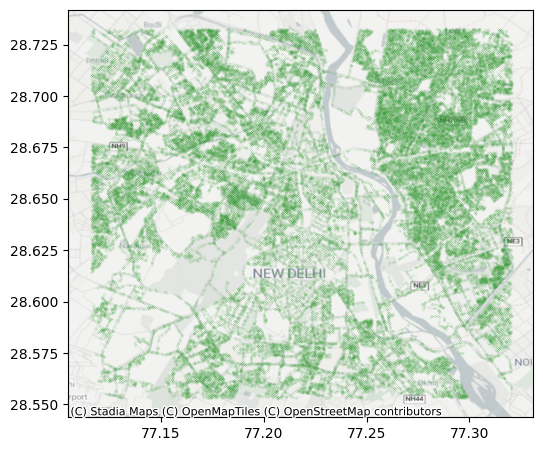

In [33]:
plot_points(DATA_FOLDER / 'synthetic' / 'delhi' / 'delhi-25m.bin', COLORS[2])

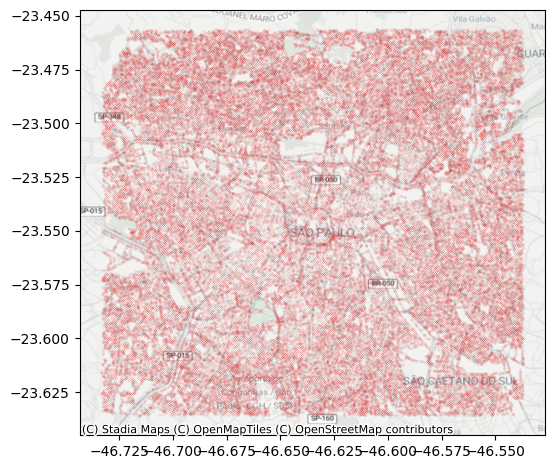

In [31]:
plot_points(DATA_FOLDER / 'synthetic' / 'sao-paolo' / 'sao-paolo-25m-swap.bin', COLORS[3])